In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from heartnet_v1 import heartnet

Using TensorFlow backend.


In [2]:
##initialize parameters of heartnet
bn_momentum = 0.99
random_seed = 1
eps= 1.1e-5
bias=False
l2_reg=0.
l2_reg_dense=0.
kernel_size=5
maxnorm=10000.
dropout_rate=0.5
dropout_rate_dense=0.
padding='valid'
activation_function='relu'
subsam=2

lr=0.0007
lr_decay=1e-8

#load_path='/media/taufiq/Data/heart_sound/models/fold0 2017-12-27 13:12:34.499110/weights.0022-0.7631.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold2 2017-12-26 15:20:36.867116/weights.0187-0.8527.hdf5'
#load_path='/media/taufiq/Data/heart_sound/remoteIICTweights/fold1 2017-12-20 15:26:47.011204/weights.0091-0.8898.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold0_noFIR 2018-01-16 17:25:30.579232/weights.0193-0.7411.hdf5'
# FIR non-learn
# load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-13 16:05:20.862887/weights.0170-0.8719.hdf5'
# FIR init learnable
# load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-16 19:58:54.149714/weights.0182-0.8773.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold2_noFIR 2018-01-16 13:40:22.284989/weights.0179-0.8756.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold3_noFIR 2018-01-16 19:59:03.934614/weights.0183-0.8581.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold2_noFIR 2018-01-21 11:57:12.236015/weights.0183-0.8311.hdf5'
# Random init
# load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-23 11:15:00.303289/weights.0037-0.8288.hdf5'
# Uniform init
# load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-23 12:27:31.167478/weights.0181-0.8754.hdf5'
# Linear phase
load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-24 16:28:06.346153/weights.0083-0.8925.hdf5'
#LP-Rand
# load_path='/media/taufiq/Data/heart_sound/models/fold2_noFIR 2018-02-02 18:19:58.579053/weights.0194-0.8750.hdf5'
fs = 2000


In [3]:
# create heartnet with load path specified

model = heartnet(load_path,activation_function, bn_momentum=0.99, bias=False, dropout_rate=0.5, dropout_rate_dense=0.0,
             eps=1.1e-5, kernel_size=5, l2_reg=0.0, l2_reg_dense=0.0,lr=0.0012843784, lr_decay=0.0001132885, maxnorm=10000.,
             padding='valid', random_seed=1, subsam=2, num_filt=(8, 4), num_dense=20,FIR_train=False)
# model.summary()
weights = model.get_weights()

In [4]:
for i in range(4):
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[61,1])

    for i in range(0,1):
        w,freq_res=signal.freqz(weights_[:,i])
        plt.plot(w/np.pi*500,10*np.log10(abs(freq_res)/max(abs(freq_res))))
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.xticks(range(0,501,50))
#     plt.xscale('log')
    plt.title('Filter of input branch ' + np.str(input_))
#     plt.hold
    plt.show()

ValueError: cannot reshape array of size 31 into shape (61,1)

In [5]:
for i in range(4):
    fig = plt.figure()
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[61,1])
    ax1 = fig.add_subplot(111)
    w,freq_res=signal.freqz(weights_)
    
    plt.plot(w/np.pi*500,10*np.log10(abs(freq_res)/max(abs(freq_res))))
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.xticks(range(0,501,50))
    
    angles = np.unwrap(np.angle(freq_res))
    ax2 = ax1.twinx()
    plt.plot(w/np.pi*500, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
#     plt.xscale('log')
    plt.title('Filter of input branch ' + np.str(input_))
#     plt.hold
    plt.axis('tight')
    plt.show()

ValueError: cannot reshape array of size 31 into shape (61,1)

In [6]:
for i in range(4):
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[61,1])
    plt.plot(weights_)
    plt.xlim(0,60)
    plt.yticks([0,0.08,0.04])
#     plt.axis('off')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=18.,
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') 
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        rotation=90,
        labelsize=18.)
#         left='off',      # ticks along the bottom edge are off
#         right='off',         # ticks along the top edge are off
#         labelleft='off') # labels along the bottom edge are off
#     plt.title('Filter of input branch ' + np.str(input_))
    plt.show()

ValueError: cannot reshape array of size 31 into shape (61,1)

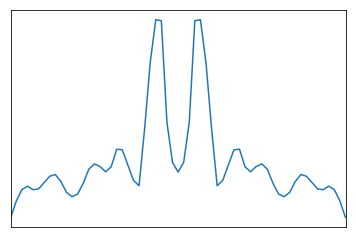

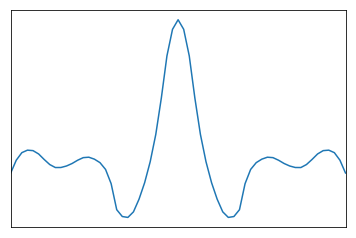

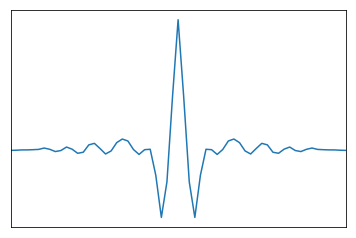

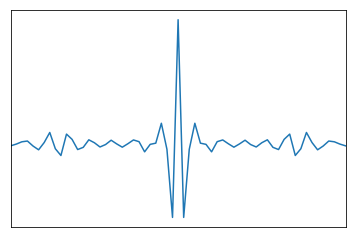

In [7]:
for i in range(4):
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[31,1])
    weights_ = np.concatenate([np.hstack(np.flip(weights_[1:,:],0)),np.hstack(weights_)])
    plt.plot(weights_)
    plt.xlim(0,60)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=18.,
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='off') # labels along the bottom edge are off
#     plt.title('Filter of input branch ' + np.str(input_))
    plt.show()

## For linear phase filters

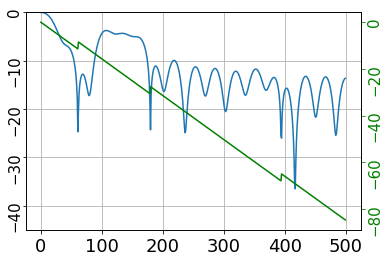

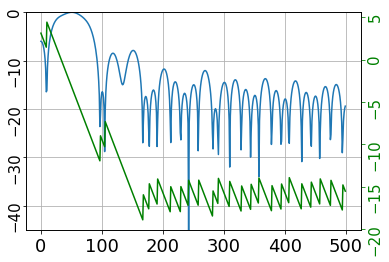

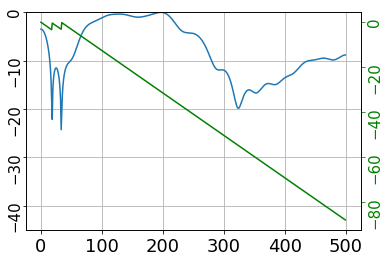

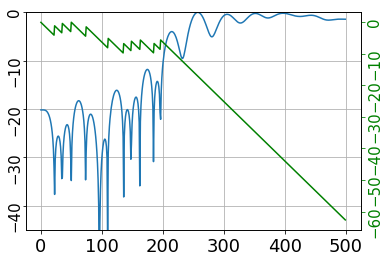

In [32]:
for i in range(4):
    fig = plt.figure()
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[31,1])
    weights_ = np.concatenate([np.hstack(np.flip(weights_[1:,:],0)),np.hstack(weights_)])

    ax1 = fig.add_subplot(111)
    w,freq_res=signal.freqz(weights_)
    
    plt.plot(w/np.pi*500,10*np.log10(abs(freq_res)/max(abs(freq_res))))
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=18.)
#         bottom='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         labelbottom='off') # labels along the bottom edge are off
    plt.grid()
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Amplitude (dB)')
    
    plt.xticks(range(0,501,100))
    plt.xlim(0,501)
    plt.ylim(-45,0)
    plt.yticks([0,-10,-20,-30,-40])
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        rotation=90,
        pad=0,
        labelsize=15.)
    
    angles = np.unwrap(np.angle(freq_res))
    ax2 = ax1.twinx()
    plt.plot(w/np.pi*500, angles, 'g')
#     plt.ylabel('Angle (radians)', color='g')
#     plt.xscale('log')
#     plt.title('Filter of input branch ' + np.str(input_))
#     plt.hold
#     plt.ylim(0,20)
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=15.,
        rotation=90,
        colors='g')
#     plt.ylabel('Angle (radians)', color='g')
#     plt.yticks([0,5,-5,-10,-15])
    plt.axis('tight')
    plt.show()

### 